# Variability VS frequency

### Same fire but with different frequency

In [1]:
import numpy as np
from math import *
import matplotlib.pyplot as plt

exec(open("ode2.py").read(), globals())

In [27]:
a = 0.2
m = 0.5
Param_phy = [a, m]      # 0.2, 10
      
Init = [1., .5]



Param_freq = {"p":  .8}#2
dt = min([0.1, 0.1/Param_freq["p"]]) ### Use small $dt$ (it could increse when we change the frequency) CHANGED
dt_ref = dt
finalTime = 100
finalTime_ref = finalTime

Param_strength = {"scale":0.01} # 0.0008
Param_coupled = {"alpha":10., # 20
                 "beta":1.}# 500



Fire_param = {"model": "coupled",
                "frequence": "bernoulli",
                "param_freq" : Param_freq,
                "amplitude": "exponential",
                "Param_strength" : Param_strength,
                "Param_coupled" : Param_coupled,
                "type" : "proportionnal",
                "coef_W_N" : 5}

In [34]:
M = [0.5, 1., 1.5]
nParall = len(M)

## References

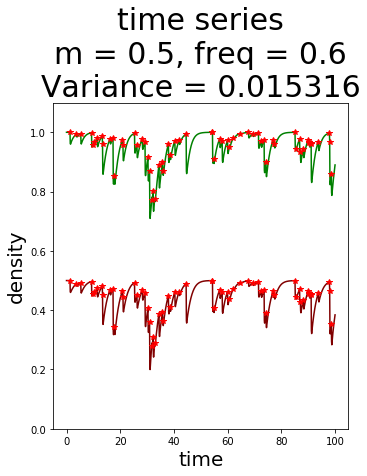

In [39]:
#Fire_events = np.zeros((nParall, 1000), dtype="bool")
#Fire_strength = np.zeros((nParall, 1000))
freq_ref = 0.6
plt.figure(figsize = (18, 6))

m_ref = M[0]
Param_phy[1] = m_ref
Init[1] = Param_phy[1]
dt=dt_ref
O = Ode(model = "allee_effect_adi", Init=Init, Param_phy= Param_phy, finalTime = finalTime, dt=dt, Fire_param = Fire_param)
nbreIter_ref = O.NbreIte
Fire_events = O.Fire_events
Fire_strength = O.Fire_strength
O.solve_by_part()
var = O.variability("N+W")
#plt.figure(figsize = (12, 6))
plt.subplot(1, nParall, j+1)
O.plot_time_series(generation=False, show=False, legend = False)
plt.title("time series\nm = "+str(m_ref)+", freq = "+str(freq_ref)+"\nVariance = "+str(round(var, 6)), fontsize = 30)
plt.show()

#### Etirements de l'array Fire Fire_events[j, :] et Fire_strength[j]

In [65]:
Freq = [0.6, .8, 1., 1.2]

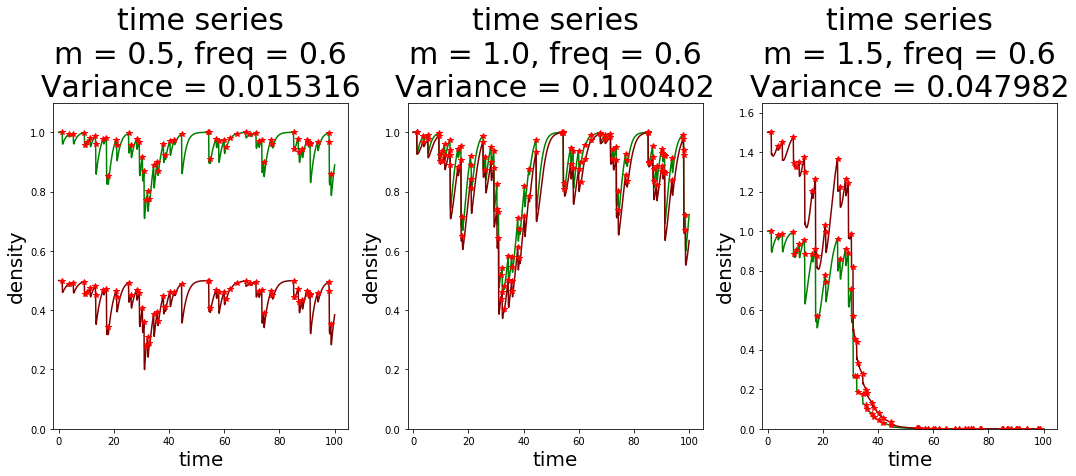

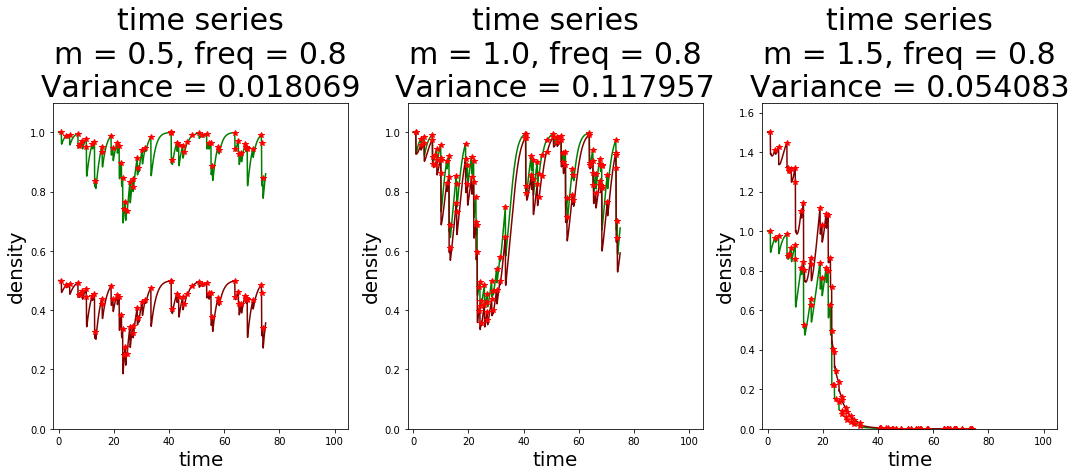

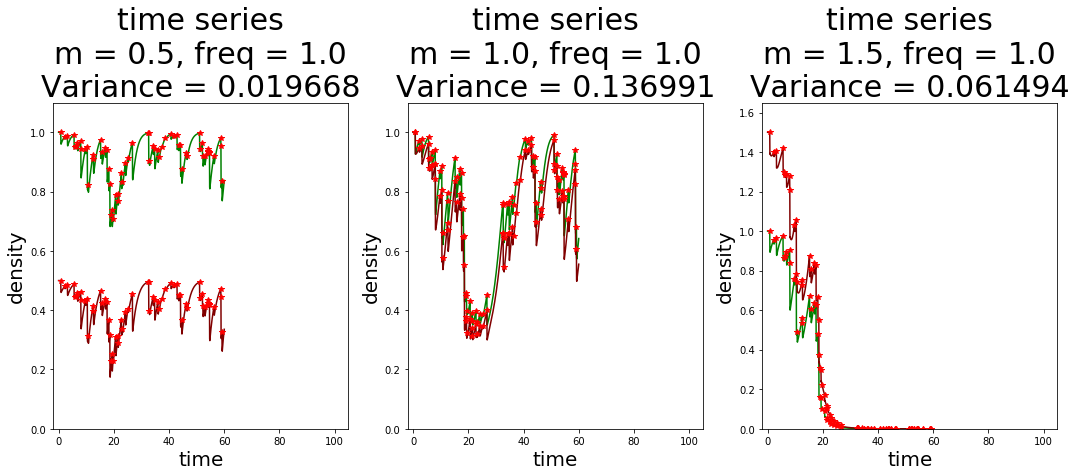

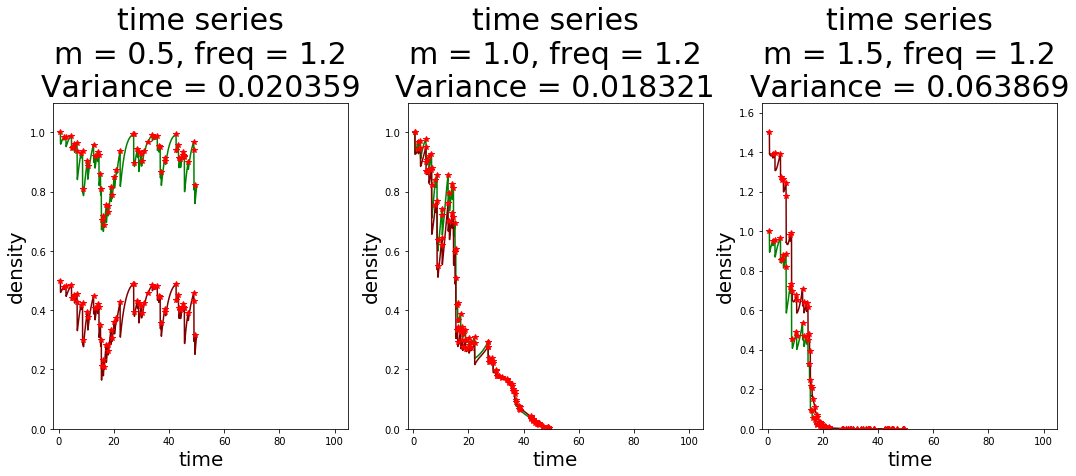

In [66]:
Var = np.zeros((len(Freq), nParall))
for i, freq in enumerate(Freq):
    ratio = round(freq/freq_ref, 6)
    dt = round(dt_ref/ratio, 6)
    finalTime  = round(finalTime_ref / ratio, 4)
    # Faire un dt plus inteligent pour eviter qu'il devienne trop grand
    #if(freq < freq_ref): #étirer
   # elif(freq > freq_ref):
    #    pass
    #else:
  #      dt = dt_ref

    #print("m = "+str(m))
    
    plt.figure(figsize = (18, 6))
    for j in range(nParall):
            Param_phy[1] = M[j]
            Init[1] = Param_phy[1]
            O = Ode(model = "allee_effect_adi", Init=Init, Param_phy= Param_phy, finalTime = finalTime, dt=dt, Fire_param = Fire_param)
            if(ratio > 1 ):
                O.Fire_events[:nbreIter_ref]  = Fire_events
                O.Fire_strength[:nbreIter_ref] = Fire_strength
            elif(ratio < 1):
                O.Fire_events  = Fire_events[:len(O.Fire_events)]
                O.Fire_strength = Fire_strength[:len(O.Fire_strength)]
            else:
                O.Fire_events = Fire_events
                O.Fire_strength = Fire_strength  
            O.solve_by_part()
            plt.subplot(1, nParall, j+1)
            O.plot_time_series(generation=False, show=False, legend = False)
            plt.xlim(-2, 105)
            var = O.variability("N+W")
            Var[i,j] = var
            plt.title("time series\nm = "+str(M[j])+", freq = "+str(Freq[i])+"\nVariance = "+str(round(var, 6)), fontsize = 30)
#        O.plot_time_series()
    plt.show()

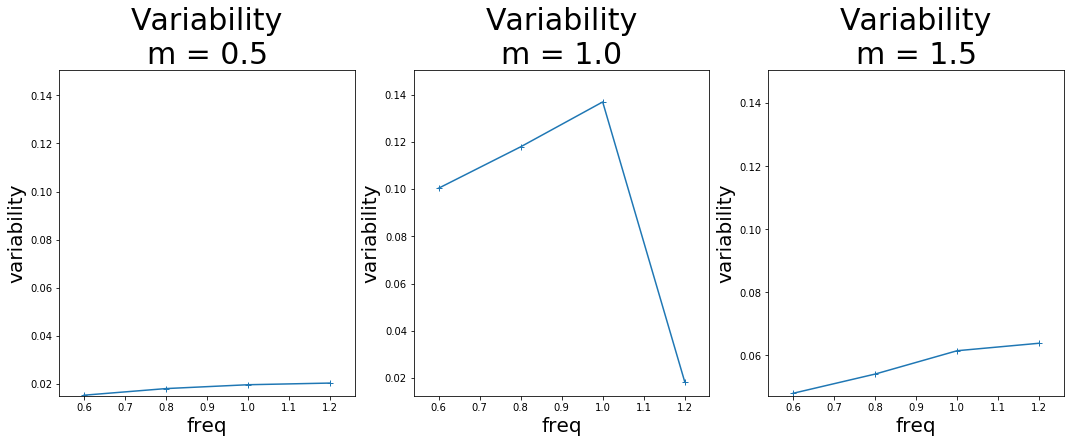

In [76]:
plt.figure(figsize = (18, 6))
mmax = np.nanmax(np.nanmax(Var))
for j,m in enumerate(M):
    plt.subplot(1, nParall, j+1)
    plt.plot(Freq, Var[:,j], "+-")
    plt.title("Variability\nm = "+str(M[j]), fontsize = 30)
    plt.xlabel("freq", fontsize = 20)
    plt.ylabel("variability", fontsize = 20)
    plt.ylim(top = 1.1*mmax)
    plt.xlim(0.9*Freq[0], 1.05*Freq[-1])
plt.show()